In [1]:
#Load the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Import all the necessary packages
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
!pip install pyspellchecker
from spellchecker import SpellChecker

     |████████████████████████████████| 2.5MB 5.6MB/s 


In [3]:
file_name = r"/content/drive/MyDrive/Information.csv"

In [ ]:
#Having a glimpse of the dataset
dataset = pd.read_csv(file_name,encoding = "ISO-8859-1", engine = 'python')
dataset.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,description,fav_number,gender_gold,link_color,name,profile_yn_gold,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,i sing my own rhythm.,0,NaN,08C2C2,sheezy0,NaN,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,I'm the author of novels filled with family dr...,68,NaN,0084B4,DavdBurnett,NaN,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,louis whining and squealing and all,7696,NaN,ABB8C2,lwtprettylaugh,NaN,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",202,NaN,0084B4,douggarland,NaN,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,37318,NaN,3B94D9,WilfordGemma,NaN,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.587300e+17,NaN,NaN


In [ ]:
#Viewing all the null values in the dataset
dataset.isna().sum()

_unit_id                     0
_golden                      0
_unit_state                  0
_trusted_judgments           0
_last_judgment_at           50
gender                      97
gender:confidence           26
profile_yn                   0
profile_yn:confidence        0
created                      0
description               3744
fav_number                   0
gender_gold              20000
link_color                   0
name                         0
profile_yn_gold          20000
profileimage                 0
retweet_count                0
sidebar_color                0
text                         0
tweet_coord              19891
tweet_count                  0
tweet_created                0
tweet_id                     0
tweet_location            7484
user_timezone             7798
dtype: int64

In [ ]:
dataset.shape

(20050, 26)

In [ ]:
#Removing the columns with all null values
data = dataset.drop(["gender_gold", "profile_yn_gold", "tweet_coord", "user_timezone", "tweet_location"], axis = 1)

In [ ]:
data = data[data["gender"] != "unknown"]

In [ ]:
#Dropping remaining null values
data = data.dropna()
data = data.reset_index()
data.shape

(15478, 22)

In [ ]:
data.head(3)

,index,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,description,fav_number,link_color,name,profileimage,retweet_count,sidebar_color,text,tweet_count,tweet_created,tweet_id
0,0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,i sing my own rhythm.,0,08C2C2,sheezy0,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,110964,10/26/15 12:40,6.587300e+17
1,1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,I'm the author of novels filled with family dr...,68,0084B4,DavdBurnett,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,7471,10/26/15 12:40,6.587300e+17
2,2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,louis whining and squealing and all,7696,ABB8C2,lwtprettylaugh,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,5617,10/26/15 12:40,6.587300e+17


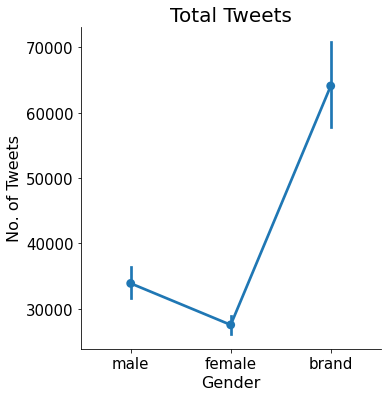

In [ ]:
graph = sns.catplot(x = "gender", y = "tweet_count", data = data, kind = "point")
fontlabs = {'size' :16}
graph = plt.xticks(fontsize = 15)
graph = plt.yticks(fontsize = 15)
graph = plt.xlabel("Gender", fontdict = fontlabs)
graph = plt.ylabel("No. of Tweets", fontdict = fontlabs)
graph = plt.title("Total Tweets", fontdict = {'size' : 20})

In [ ]:
# Brands tweet more than any individual

In [ ]:
checker = SpellChecker()
x = []
tweet1 = data['text'][15]
tweetlist = tweet1.lower().split()
s = 0
for word in tweetlist:
    if word != checker.correction(word):
      s = 1
      break
if s == 1:
  x.append(1)  # There is a typo
else:
  x.append(0)  # There is no typo  

x


[1]

In [ ]:
tweet1

"@giannaaa28 lmao _Ù÷â_Ù÷â dude I'm hella scared for next episode bc the ending to yesterday's"

In [ ]:
checker = SpellChecker()
X = []
for i in range(len(data['text'])):
  if i % 100 == 0:
    print(i)
  tweet1 = data['text'][i]
  tweetlist = tweet1.lower().split()
  s = 0
  for word in tweetlist:
    if word != checker.correction(word):
      s = 1
      break
  if s == 1:
    X.append(1)  # There is a typo
  else:
    X.append(0)  # There is no typo  


0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400


In [ ]:
sum(X)

11978

In [ ]:
data2 = data[data["gender"] != "brand"]
data2 = data2.drop(['level_0'], axis = 1)
data2 = data2.reset_index()
data2.shape

KeyError: ignored

In [ ]:
data2.head()

,index,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,description,fav_number,link_color,name,profileimage,retweet_count,sidebar_color,text,tweet_count,tweet_created,tweet_id
0,0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,i sing my own rhythm.,0,08C2C2,sheezy0,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,110964,10/26/15 12:40,6.587300e+17
1,1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,I'm the author of novels filled with family dr...,68,0084B4,DavdBurnett,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,7471,10/26/15 12:40,6.587300e+17
2,2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,louis whining and squealing and all,7696,ABB8C2,lwtprettylaugh,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,5617,10/26/15 12:40,6.587300e+17
3,3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",202,0084B4,douggarland,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,1693,10/26/15 12:40,6.587300e+17
4,4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,37318,3B94D9,WilfordGemma,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,31462,10/26/15 12:40,6.587300e+17


In [ ]:
data2.shape

(11162, 22)

In [ ]:
checker = SpellChecker()
x = []
for i in range(len(data2['text'])):
  if i % 100 == 0:
    print(i)
  tweet1 = data['text'][i]
  tweetlist = tweet1.lower().split()
  s = 0
  for word in tweetlist:
    if word != checker.correction(word):
      s = 1
      break
  if s == 1:
    x.append(1)  # There is a typo
  else:
    x.append(0)  # There is no typo

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100


In [66]:
# Import libraries for making the model
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import VotingClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
data["tweet_typo"] = X
data2["tweet_typo"] = x

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
data.to_csv(r"/content/drive/MyDrive/Information-data.csv")
data2.to_csv(r"/content/drive/MyDrive/Information-data2.csv")

In [ ]:
### Information-data.csv contains 3 genders including brand
### Information-data2.csv contains 2 genders only

In [6]:
data_1 = pd.read_csv(r"/content/drive/MyDrive/Information-data.csv")
data_2 = pd.read_csv(r"/content/drive/MyDrive/Information-data2.csv")

In [7]:
data_1.head()

,Unnamed: 0,index,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,description,fav_number,link_color,name,profileimage,retweet_count,sidebar_color,text,tweet_count,tweet_created,tweet_id,tweet_typo
0,0,0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,i sing my own rhythm.,0,08C2C2,sheezy0,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,110964,10/26/15 12:40,6.587300e+17,0
1,1,1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,I'm the author of novels filled with family dr...,68,0084B4,DavdBurnett,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,7471,10/26/15 12:40,6.587300e+17,1
2,2,2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,louis whining and squealing and all,7696,ABB8C2,lwtprettylaugh,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,5617,10/26/15 12:40,6.587300e+17,0
3,3,3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",202,0084B4,douggarland,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,1693,10/26/15 12:40,6.587300e+17,0
4,4,4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,37318,3B94D9,WilfordGemma,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,31462,10/26/15 12:40,6.587300e+17,1


In [8]:
data_final_1 = data_1[["_unit_id", "_trusted_judgments", "gender", "gender:confidence", "profile_yn:confidence", "fav_number", "retweet_count", "tweet_count", "tweet_typo"]]
data_final_2 = data_2[["_unit_id", "_trusted_judgments", "gender", "gender:confidence", "profile_yn:confidence", "fav_number", "retweet_count", "tweet_count", "tweet_typo"]]

In [9]:
le = LabelEncoder()
#data_final_1["gender"] = le.fit_transform(data_final_1["gender"])
data_final_2["gender"] = le.fit_transform(data_final_2["gender"])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
data_final_2.head()

# 1 - Male
# 0 - Female

,_unit_id,_trusted_judgments,gender,gender:confidence,profile_yn:confidence,fav_number,retweet_count,tweet_count,tweet_typo
0,815719226,3,1,1.0000,1.0,0,0,110964,0
1,815719227,3,1,1.0000,1.0,68,0,7471,1
2,815719228,3,1,0.6625,1.0,7696,1,5617,0
3,815719229,3,1,1.0000,1.0,202,0,1693,0
4,815719230,3,0,1.0000,1.0,37318,0,31462,1


In [12]:
y = data_final_2['gender'].values
X = data_final_2[[column for column in data_final_2.columns if column not in ['gender']]]
X.head()

,_unit_id,_trusted_judgments,gender:confidence,profile_yn:confidence,fav_number,retweet_count,tweet_count,tweet_typo
0,815719226,3,1.0000,1.0,0,0,110964,0
1,815719227,3,1.0000,1.0,68,0,7471,1
2,815719228,3,0.6625,1.0,7696,1,5617,0
3,815719229,3,1.0000,1.0,202,0,1693,0
4,815719230,3,1.0000,1.0,37318,0,31462,1


In [13]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 19)

In [39]:
logclf = LogisticRegression(random_state = 19)
knn = KNeighborsClassifier(n_neighbors=27)
dt = DecisionTreeClassifier(
    #bootstrap = False,
    max_depth = 10,
    max_features = 'sqrt',
    min_samples_leaf = 2,
    min_samples_split = 10,
    #n_estimators = 200,
    random_state = 19
)

In [40]:
logclf.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
accuracy_score(y_test, y_pred)

0.5598686174977605

In [33]:
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred)

0.5437444013138251

In [34]:
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
accuracy_score(y_test, y_pred)

0.5616601970737534

In [17]:
rf = RandomForestClassifier(random_state = 19)

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [21]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, random_state = 19, n_jobs = -1)
# Fit the random search model
rf_random.fit(X,y)

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [24]:
rf_random.best_params_

{'bootstrap': False,
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 200}

In [25]:
rf = RandomForestClassifier(
    bootstrap = False,
    max_depth = 10,
    max_features = 'sqrt',
    min_samples_leaf = 2,
    min_samples_split = 10,
    n_estimators = 200
)

In [27]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [28]:
y_pred = rf.predict(X_test)
accuracy_score(y_pred, y_test)

0.5335921170498656

In [79]:
vot_clf = VotingClassifier(estimators = [('lr', logclf), ('knn', knn), ('dt', dt), ('rf', rf)], voting = 'hard')

In [80]:
vot_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=19,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('knn',
                              KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkowski',
                                                  

In [81]:
y_pred = vot_clf.predict(X_test)
accuracy_score(y_pred, y_test)

0.5634517766497462

In [82]:
cm = confusion_matrix(y_test, y_pred)

In [83]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    import itertools   

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

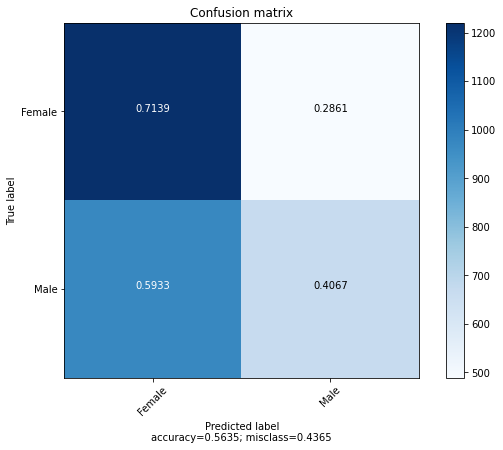

In [84]:
plot_confusion_matrix(cm, ['Female', 'Male'])

In [85]:
# In conclusion 
# Females make more typos than men